# **Importing Libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# **Reading Dataset**

In [17]:
df = pd.read_excel('Maven Business School.xlsx')
df.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252.0,276.0,Placed,111000
1,2,Business,62.1,92.8,No,423.0,410.0,Not Placed,NaN
2,3,Computer Science,70.2,68.7,Yes,101.0,119.0,Placed,107000
3,4,Engineering,75.1,80.7,No,288.0,334.0,Not Placed,NaN
4,5,Finance,60.9,74.9,No,248.0,252.0,Not Placed,NaN


# **Data Preprocessing**

In [18]:
#Checking count of all missing values
df.isnull().sum()

,0
Student ID,0
Undergrad Degree,0
Undergrad Grade,36
MBA Grade,0
Work Experience,0
Employability (Before),7
Employability (After),5
Status,0
Annual Salary,267


**Treating Missing Values**

In [19]:
df['Annual Salary'].unique()

array([111000, nan, 107000, 109000, 148000, 255500, 103500, 114500,
       124000, 132500, 99000, 82000, 185000, 89500, 91500, 113500, 75500,
       86000, 156500, 99500, 205500, 340000, 103000, 165000, 124500,
       82500, 93000, 168000, 96000, 80000, 144500, 104500, 113000, 78000,
       84000, 163666.66666666666, ' ', 159666.66666666666,
       162333.33333333334, 214333.33333333334, 357666.6666666667, 155000,
       169666.66666666666, 182333.33333333334, 193666.66666666666, 149000,
       126333.33333333333, 263666.6666666666, 136333.3333333333, 139000,
       168333.33333333334, 117666.66666666667, 131666.6666666667,
       225666.66666666666, 149666.66666666666, 291000, 470333.3333333333,
       154333.33333333334, 237000, 183000, 127000, 141000, 241000, 145000,
       123666.66666666667, 209666.66666666666, 156333.33333333334,
       167666.66666666666, 121000, 129000], dtype=object)

In [20]:
# Replace ' ' in Annual Salary with NaN
df['Annual Salary'] = df['Annual Salary'].replace(' ', np.nan)

/tmp/ipython-input-20-2294298536.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Annual Salary'] = df['Annual Salary'].replace(' ', np.nan)


In [21]:
# Convert the column to numeric, coercing errors to NaN
df['Annual Salary'] = pd.to_numeric(df['Annual Salary'], errors='coerce')

In [22]:
# If Annual Salary is missing and Status is 'Not Placed' we will make it 0 as student is not placed
df.loc[(df['Status'] == 'Not Placed') & (df['Annual Salary'].isnull()), 'Annual Salary'] = 0

In [23]:
# Filling Missing Annual Salary for Status as Placed with the median Salary of that particular Undergrad degree
df['Annual Salary'] = df.groupby('Undergrad Degree')['Annual Salary'].transform(lambda x: x.fillna(x.median()))

In [24]:
# Filling missing undergrad grade with the mean undergrad grade of that particular undergrad degree
df['Undergrad Grade'] = df.groupby('Undergrad Degree')['Undergrad Grade'].transform(lambda x: x.fillna(x.mean()))

In [25]:
# Filling missing employability (Before) with the mean employability (Before) of that particular undergrad degree
df['Employability (Before)'] = df.groupby('Undergrad Degree')['Employability (Before)'].transform(lambda x: x.fillna(x.mean()))

In [26]:
# Filling missing employability (After) with the mean employability (After) of that particular undergrad degree
df['Employability (After)'] = df.groupby('Undergrad Degree')['Employability (After)'].transform(lambda x: x.fillna(x.mean()))

In [27]:
# Check all missing values
df.isnull().sum()

,0
Student ID,0
Undergrad Degree,0
Undergrad Grade,0
MBA Grade,0
Work Experience,0
Employability (Before),0
Employability (After),0
Status,0
Annual Salary,0


# **Renaming Columns**

In [28]:
# Renaming all columbs to replace space with _
df.columns = df.columns.str.replace(' ', '_')

# Change Employability_(Before) Column Name to Employability_Before
df.rename(columns={'Employability_(Before)': 'Employability_Before'}, inplace=True)

# Change Employability_(After) Column Name to Employability_After
df.rename(columns={'Employability_(After)': 'Employability_After'}, inplace=True)

In [29]:
# Show all column names
df.columns

Index(['Student_ID', 'Undergrad_Degree', 'Undergrad_Grade', 'MBA_Grade',
       'Work_Experience', 'Employability_Before', 'Employability_After',
       'Status', 'Annual_Salary'],
      dtype='object')

# **Exploratory Data Analysis**

/tmp/ipython-input-30-2200703272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Work_Experience', y='Annual_Salary', data=df, palette='Set2')


Text(0, 0.5, 'Annual Salary')

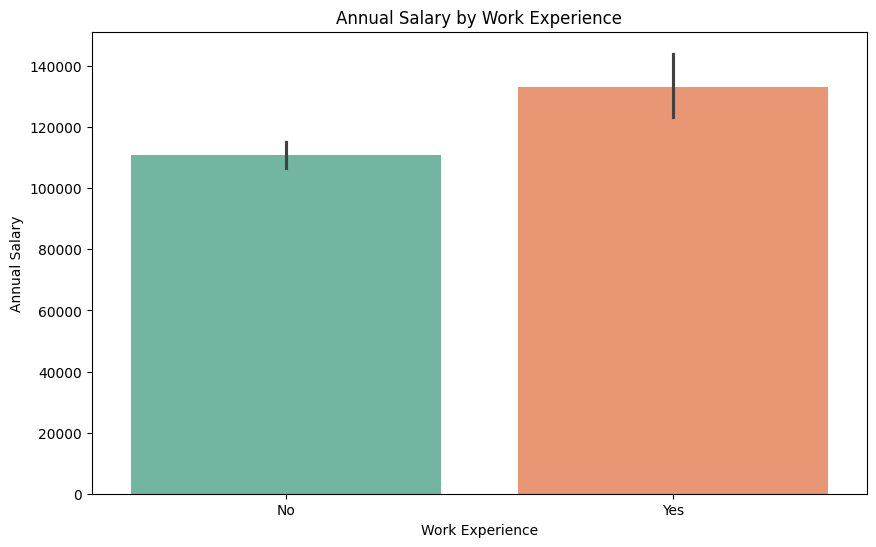

In [30]:
# Bar Chart of Annual Salary with and without Work_Experience with orange color scheme
plt.figure(figsize=(10, 6))
sns.barplot(x='Work_Experience', y='Annual_Salary', data=df, palette='Set2')
plt.title('Annual Salary by Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Annual Salary')

In [31]:
# Pie Chart of Students who are Placed V/s. Not Placed
labels = df.groupby('Status').count()['Student_ID'].index
values = df.groupby('Status').count()['Student_ID'].values
px.pie(names = labels,values=values,width=600,height=400,color_discrete_sequence=px.colors.qualitative.Pastel1,title='Student Distribution')

/tmp/ipython-input-32-893436753.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'MBA Grade')

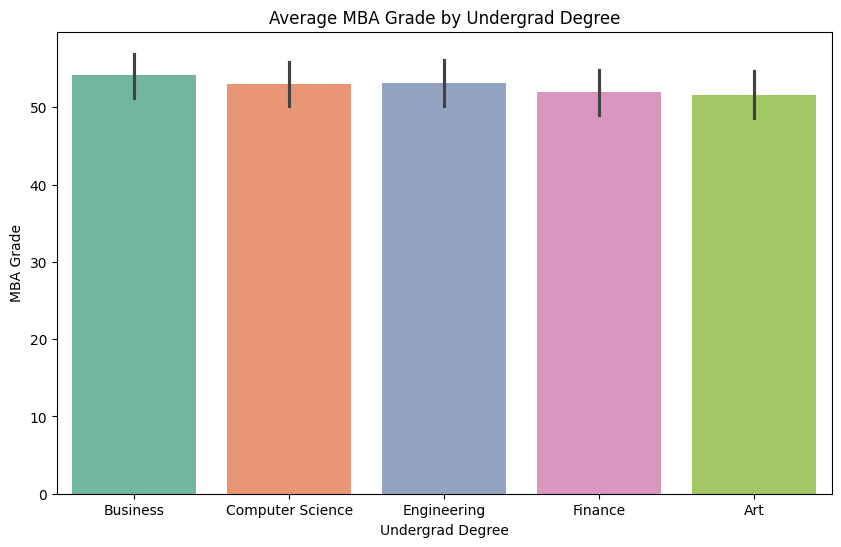

In [32]:
# Average Grade in MBA Based on Undergrad_Degree
plt.figure(figsize=(10, 6))
sns.barplot(x='Undergrad_Degree', y='MBA_Grade', data=df, palette='Set2')
plt.title('Average MBA Grade by Undergrad Degree')
plt.xlabel('Undergrad Degree')
plt.ylabel('MBA Grade')

<Axes: xlabel='Undergrad_Grade', ylabel='MBA_Grade'>

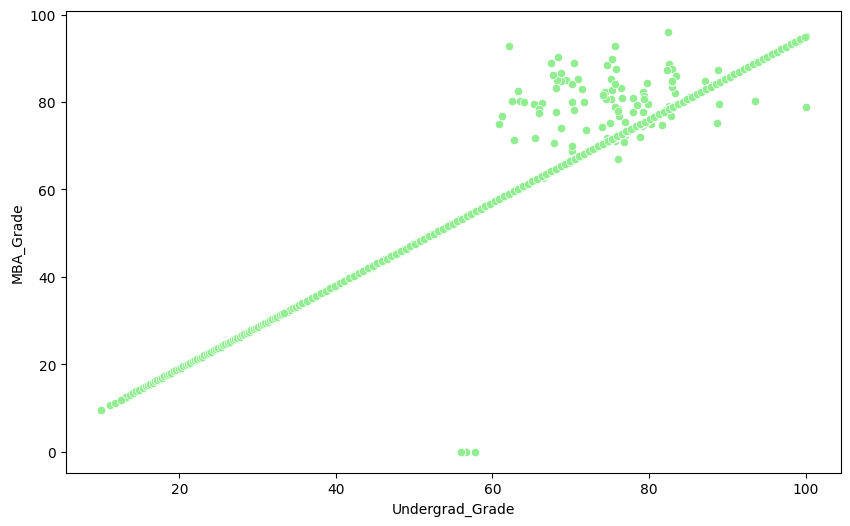

In [33]:
# Relation Between undergrad_grade and MBA_Grade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Undergrad_Grade', y='MBA_Grade', data=df, color='lightgreen')

In [34]:
# Distribution of different Undergrad_Degree Majors in a Pie Chart
labels = df.groupby('Undergrad_Degree').count()['Student_ID'].index
values = df.groupby('Undergrad_Degree').count()['Student_ID'].values
px.pie(names = labels,values=values,width=600,height=400,color_discrete_sequence=px.colors.qualitative.Pastel1,title='Undegrad student distribution')

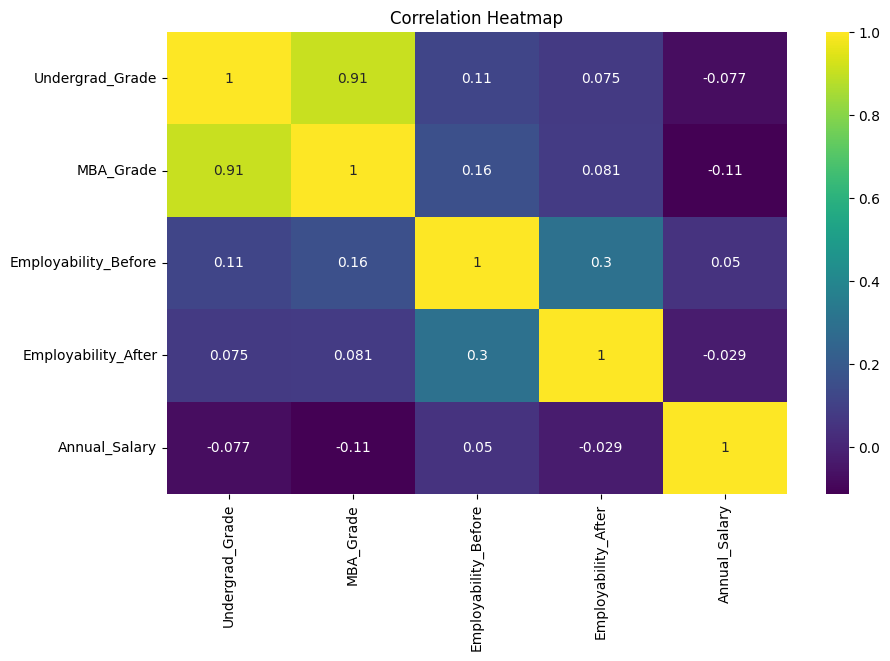

In [35]:
#Correlation Heat Map for all Numerical Variables
numeric_df = df.drop(columns=['Student_ID']).select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

/tmp/ipython-input-36-4169154426.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Average Annual Salary by Undergrad Degree')

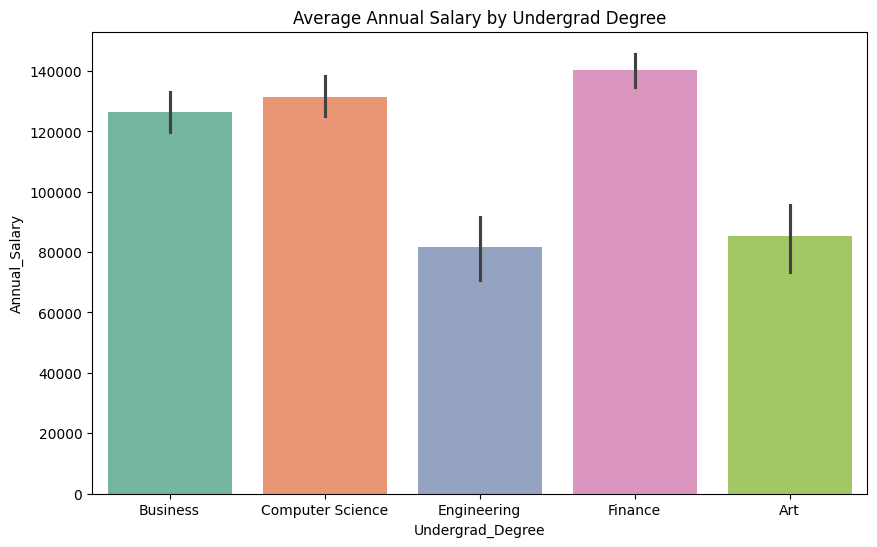

In [36]:
# Comparing Undergrad Majors with Annual Salary
plt.figure(figsize=(10, 6))
sns.barplot(x='Undergrad_Degree', y='Annual_Salary', data=df, palette='Set2')
plt.title('Average Annual Salary by Undergrad Degree')

/tmp/ipython-input-37-891522507.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'MBA Grade by Work Experience')

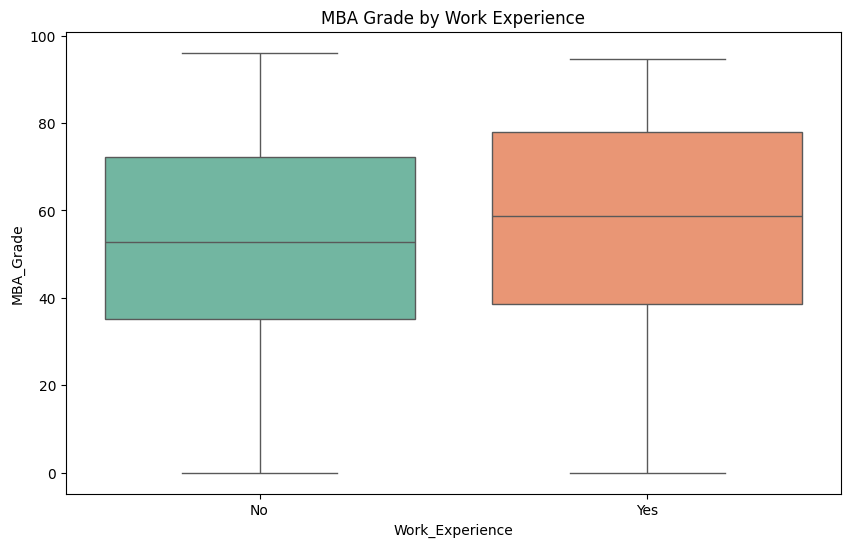

In [37]:
# Work Experience V/S. MBA_Grade using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Work_Experience', y='MBA_Grade', data=df, palette='Set2')
plt.title('MBA Grade by Work Experience')

/tmp/ipython-input-38-870735158.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Employability_Before', ylabel='Employability_After'>

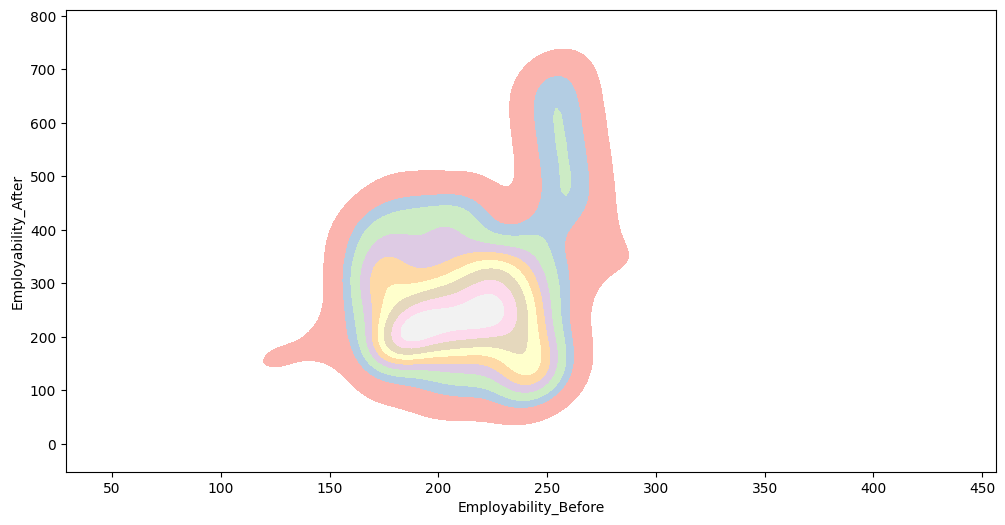

In [38]:
# kdeplot of Employability_before and Employability_After
plt.figure(figsize=(12,6))
sns.set_palette('ocean')
sns.kdeplot(x='Employability_Before',y='Employability_After',data=df,shade=True, cmap='Pastel1')

/tmp/ipython-input-39-306175664.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Average Employability Before by Undergrad Degree')

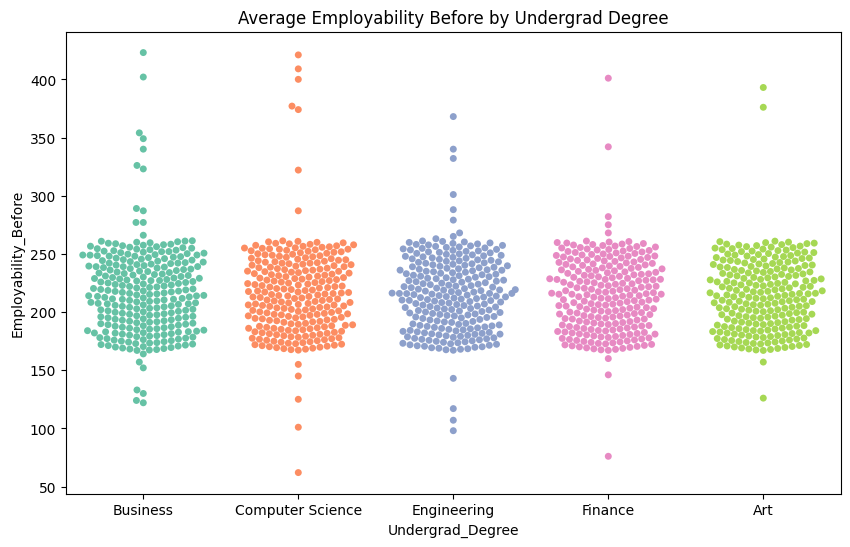

In [39]:
# Undergrad_Degree V/s. Employability_Before
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Undergrad_Degree', y='Employability_Before', data=df, palette='Set2')
plt.title('Average Employability Before by Undergrad Degree')

/tmp/ipython-input-40-682694773.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'MBA Grade by Status')

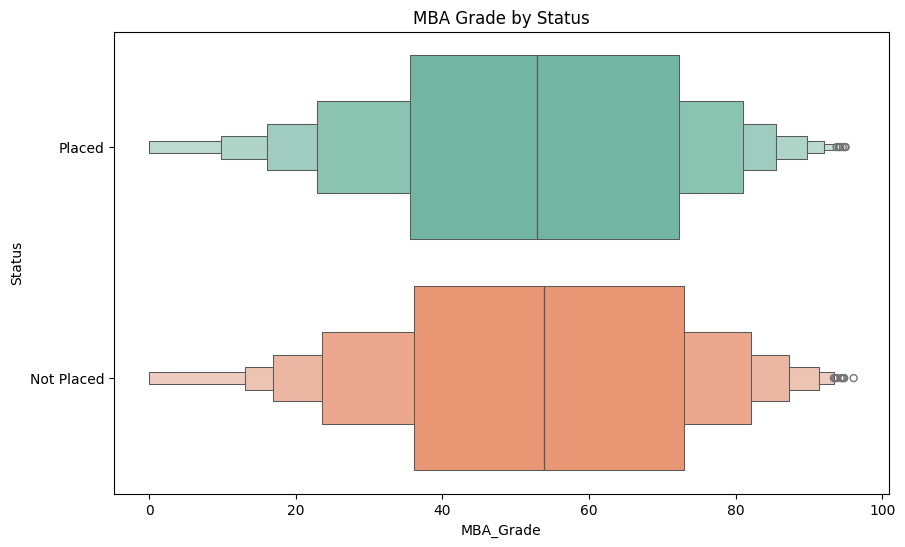

In [40]:
# MBA Grade V/s. Status
plt.figure(figsize=(10, 6))
sns.boxenplot(x='MBA_Grade', y='Status', data=df, palette='Set2')
plt.title('MBA Grade by Status')

# **Placement Rate Analysis**

In [53]:
# Overall Placement Rate (Percentage of Students Placed)
Percentage_Placed = (df['Status'].value_counts()['Placed'] / len(df)) * 100
print(f"Overall Placement Rate: {Percentage_Placed:.2f}%")

# Placement Rate by Undergrad Degree
Placement_Rate_by_Degree = df.groupby('Undergrad_Degree')['Status'].apply(lambda x: (x == 'Placed').mean() * 100)
print("\nPlacement Rate by Undergrad Degree:")
print(Placement_Rate_by_Degree)

# Placement by MBA Grade
bins = [0, 67, 74, 85, 93, 100]
labels = ['F', 'D', 'C', 'B', 'A']

grade_cat_type = pd.CategoricalDtype(categories=['A', 'B', 'C', 'D', 'F'], ordered=True)
df['Grade_Category'] = pd.cut(df['MBA_Grade'], bins=bins, labels=labels, right=True, include_lowest=True)
df['Grade_Category'] = df['Grade_Category'].astype(grade_cat_type)

placement_rate_by_grade_cat = df.groupby('Grade_Category', observed=True)['Status'].apply(lambda x: (x == 'Placed').mean() * 100)

print("\nPlacement Rate by MBA Grade Category:")
print(placement_rate_by_grade_cat)

Overall Placement Rate: 59.67%

Placement Rate by Undergrad Degree:
Undergrad_Degree
Art                  2.608696
Business            93.385214
Computer Science    96.250000
Engineering          3.765690
Finance             98.290598
Name: Status, dtype: float64

Placement Rate by MBA Grade Category:
Grade_Category
A    50.000000
B    54.666667
C    62.032086
D    57.692308
F    60.049020
Name: Status, dtype: float64


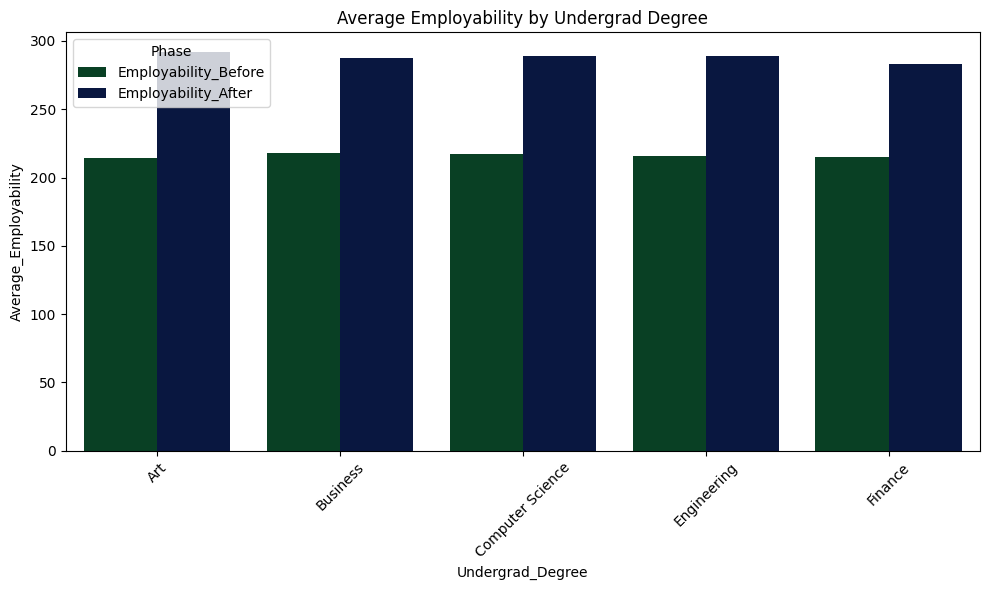

In [60]:
# Group by Undergrad Degree and take mean
degree_means = df.groupby('Undergrad_Degree')[['Employability_Before', 'Employability_After']].mean().reset_index()

# Melt for bar plot
degree_melt = degree_means.melt(id_vars='Undergrad_Degree', var_name='Phase', value_name='Average_Employability')

plt.figure(figsize=(10,6))
sns.barplot(data=degree_melt, x='Undergrad_Degree', y='Average_Employability', hue='Phase')
plt.title('Average Employability by Undergrad Degree')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


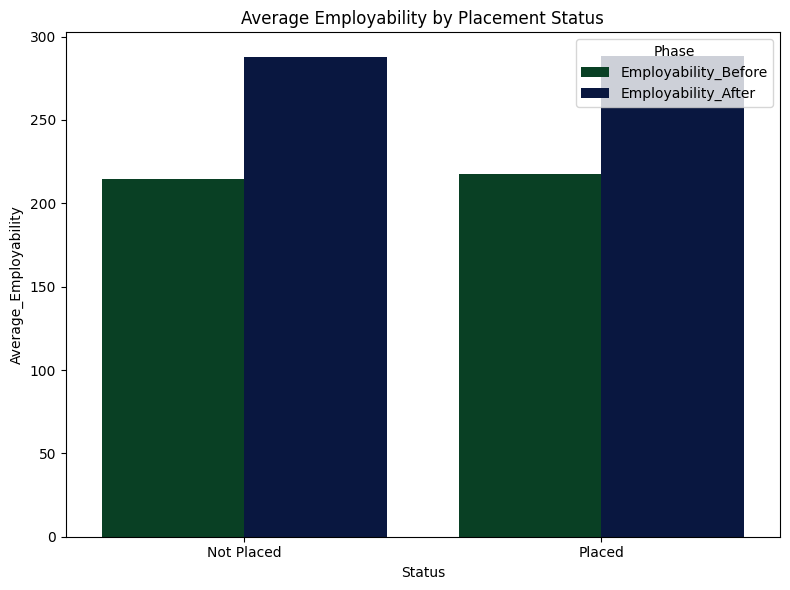

In [61]:
# Bar Chart by Placement Status
status_means = df.groupby('Status')[['Employability_Before', 'Employability_After']].mean().reset_index()
status_melt = status_means.melt(id_vars='Status', var_name='Phase', value_name='Average_Employability')

plt.figure(figsize=(8,6))
sns.barplot(data=status_melt, x='Status', y='Average_Employability', hue='Phase')
plt.title('Average Employability by Placement Status')
plt.tight_layout()
plt.show()

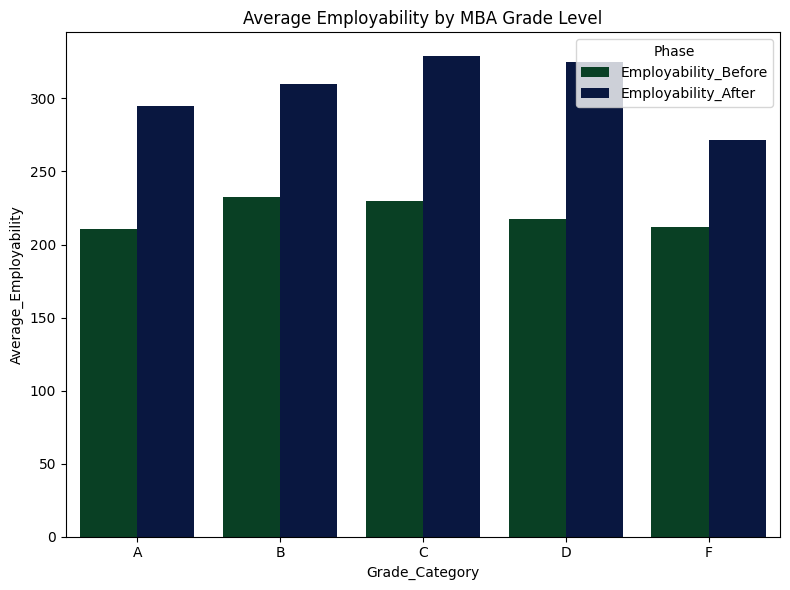

In [62]:
grade_means = df.groupby('Grade_Category', observed=True)[['Employability_Before', 'Employability_After']].mean().reset_index()
grade_melt = grade_means.melt(id_vars='Grade_Category', var_name='Phase', value_name='Average_Employability')

plt.figure(figsize=(8,6))
sns.barplot(data=grade_melt, x='Grade_Category', y='Average_Employability', hue='Phase', order=['A','B','C','D','F'])
plt.title('Average Employability by MBA Grade Level')
plt.tight_layout()
plt.show()